In [48]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
descrip=pd.read_excel('Data Dictionary.xlsx')
descrip

,Variable Name,Description
0,Carat,Carat weight of the cubic zirconia.
1,Cut,Describe the cut quality of the cubic zirconi...
2,Color,Colour of the cubic zirconia.With D being the...
3,Clarity,cubic zirconia Clarity refers to the absence ...
4,Depth,"The Height of a cubic zirconia, measured from..."
5,Table,The Width of the cubic zirconia's Table expre...
6,Price,the Price of the cubic zirconia.
7,X,Length of the cubic zirconia in mm.
8,Y,Width of the cubic zirconia in mm.
9,Z,Height of the cubic zirconia in mm.


In [345]:
train=pd.read_csv('train.csv')
train

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.544971,Ideal,E,SI1,63.911017,52.575829,5.447452,4.053076,3.701485,3.558
1,2.073682,Premium,J,SI1,67.642925,57.660288,6.266665,7.661507,6.177051,24.738
2,0.606198,Premium,G,VS1,55.617310,60.388787,6.800151,5.096966,3.480326,3.630
3,0.695397,Premium,G,SI2,60.587811,71.325721,5.366931,6.616767,4.454435,4.218
4,0.282651,Ideal,E,VVS2,68.970056,54.372123,4.920104,4.409408,4.361358,1.578
...,...,...,...,...,...,...,...,...,...,...
11995,0.251768,Premium,E,VS1,69.674513,52.790228,5.657402,5.832983,3.386799,1.628
11996,1.729415,Premium,H,SI1,56.191121,48.024573,6.725585,8.624433,4.822269,15.508
11997,2.252697,Very Good,I,SI2,64.007494,63.641838,8.510526,9.108384,3.674364,20.018
11998,0.139030,Very Good,D,VS2,64.885328,55.383459,2.799799,2.281538,2.419920,0.746


In [346]:
test=pd.read_csv('test.csv')
test

,carat,cut,color,clarity,depth,table,x,y,z
0,0.136542,Ideal,E,VVS1,53.580195,50.662146,5.078804,1.893405,0.283778
1,0.528934,Ideal,H,VVS1,56.039564,58.315195,6.901560,4.694186,3.803880
2,0.818501,Very Good,I,VS1,58.287214,58.878251,5.282745,5.514879,4.377075
3,1.411504,Premium,H,SI1,63.240206,61.764862,6.863968,9.117281,5.220630
4,1.052036,Fair,J,SI2,46.715415,66.960371,6.725186,4.191414,3.642572
...,...,...,...,...,...,...,...,...,...
2995,0.372864,Ideal,E,VVS2,58.553707,50.438915,6.526824,4.468635,3.213217
2996,0.295339,Very Good,F,SI1,54.340962,57.051567,4.966836,3.510724,3.014146
2997,0.506524,Good,F,VVS2,62.533965,68.258620,5.656203,4.301152,4.219405
2998,2.183475,Ideal,I,SI2,63.805363,53.965803,7.994936,8.969361,4.001043


In [347]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    12000 non-null  float64
 1   cut      12000 non-null  object 
 2   color    12000 non-null  object 
 3   clarity  12000 non-null  object 
 4   depth    12000 non-null  float64
 5   table    12000 non-null  float64
 6   x        12000 non-null  float64
 7   y        12000 non-null  float64
 8   z        12000 non-null  float64
 9   price    12000 non-null  float64
dtypes: float64(7), object(3)
memory usage: 937.6+ KB


In [348]:
train.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [349]:
test.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [350]:
#So, there are no missing values

In [351]:
#Now, dealing with categorical data

In [352]:
train.cut.unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [353]:
train.color.unique()

array(['E', 'J', 'G', 'D', 'H', 'F', 'I'], dtype=object)

In [354]:
train.clarity.unique()

array(['SI1', 'VS1', 'SI2', 'VVS2', 'VS2', 'IF', 'VVS1', 'I1'],
      dtype=object)

In [355]:
train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [356]:
categorical_features=['cut','color','clarity']
x_features=['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
encoded_train=pd.get_dummies(train[x_features],columns=categorical_features,drop_first=True)

In [357]:
encoded_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [358]:
x_features=encoded_train.columns

In [359]:
#Dealing with outliers

In [360]:
#q1=train.quantile(0.25)
#q2=train.median()
#q3=train.quantile(0.75)
#iqr=q3-q1
#upper=q3+1.5*iqr
#lower=q1-1.5*iqr
#upper,lower

In [361]:
#train[train>upper]=np.nan
#train[train<lower]=np.nan

In [362]:
#train.fillna(train.mean(),inplace=True)
#train

In [363]:
#value mapping categoric values to discrete/numeric values(method 1)
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
train['cut']=label_en.fit_transform(train['cut'])
train['color']=label_en.fit_transform(train['color'])
train['clarity']=label_en.fit_transform(train['clarity'])
test['cut']=label_en.fit_transform(test['cut'])
test['color']=label_en.fit_transform(test['color'])
test['clarity']=label_en.fit_transform(test['clarity'])
train.clarity.unique()

array([2, 4, 3, 7, 5, 1, 6, 0])

In [364]:
#5-number summary
train.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,0.795368,2.546083,2.600500,3.829500,61.720080,57.490596,5.731005,5.716316,3.528779,7.846779
std,0.485184,1.024677,1.707477,1.733209,5.160848,5.473837,1.492658,1.503996,1.216390,8.000676
min,0.020265,0.000000,0.000000,0.000000,39.768041,36.987798,0.031002,0.307422,0.006598,0.652000
25%,0.405042,2.000000,1.000000,2.000000,58.227008,53.812489,4.659935,4.631587,2.684302,1.886000
50%,0.684387,2.000000,3.000000,4.000000,61.720635,57.388137,5.681654,5.678285,3.508792,4.734000
75%,1.074885,3.000000,4.000000,5.000000,65.219405,61.172691,6.747104,6.738530,4.361609,10.730000
max,4.445496,4.000000,6.000000,7.000000,81.160537,84.895276,11.133427,11.205688,7.983576,37.608000


<AxesSubplot:>

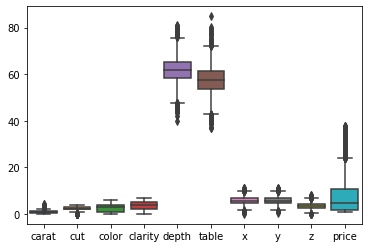

In [294]:
#boxplot
sns.boxplot(train)

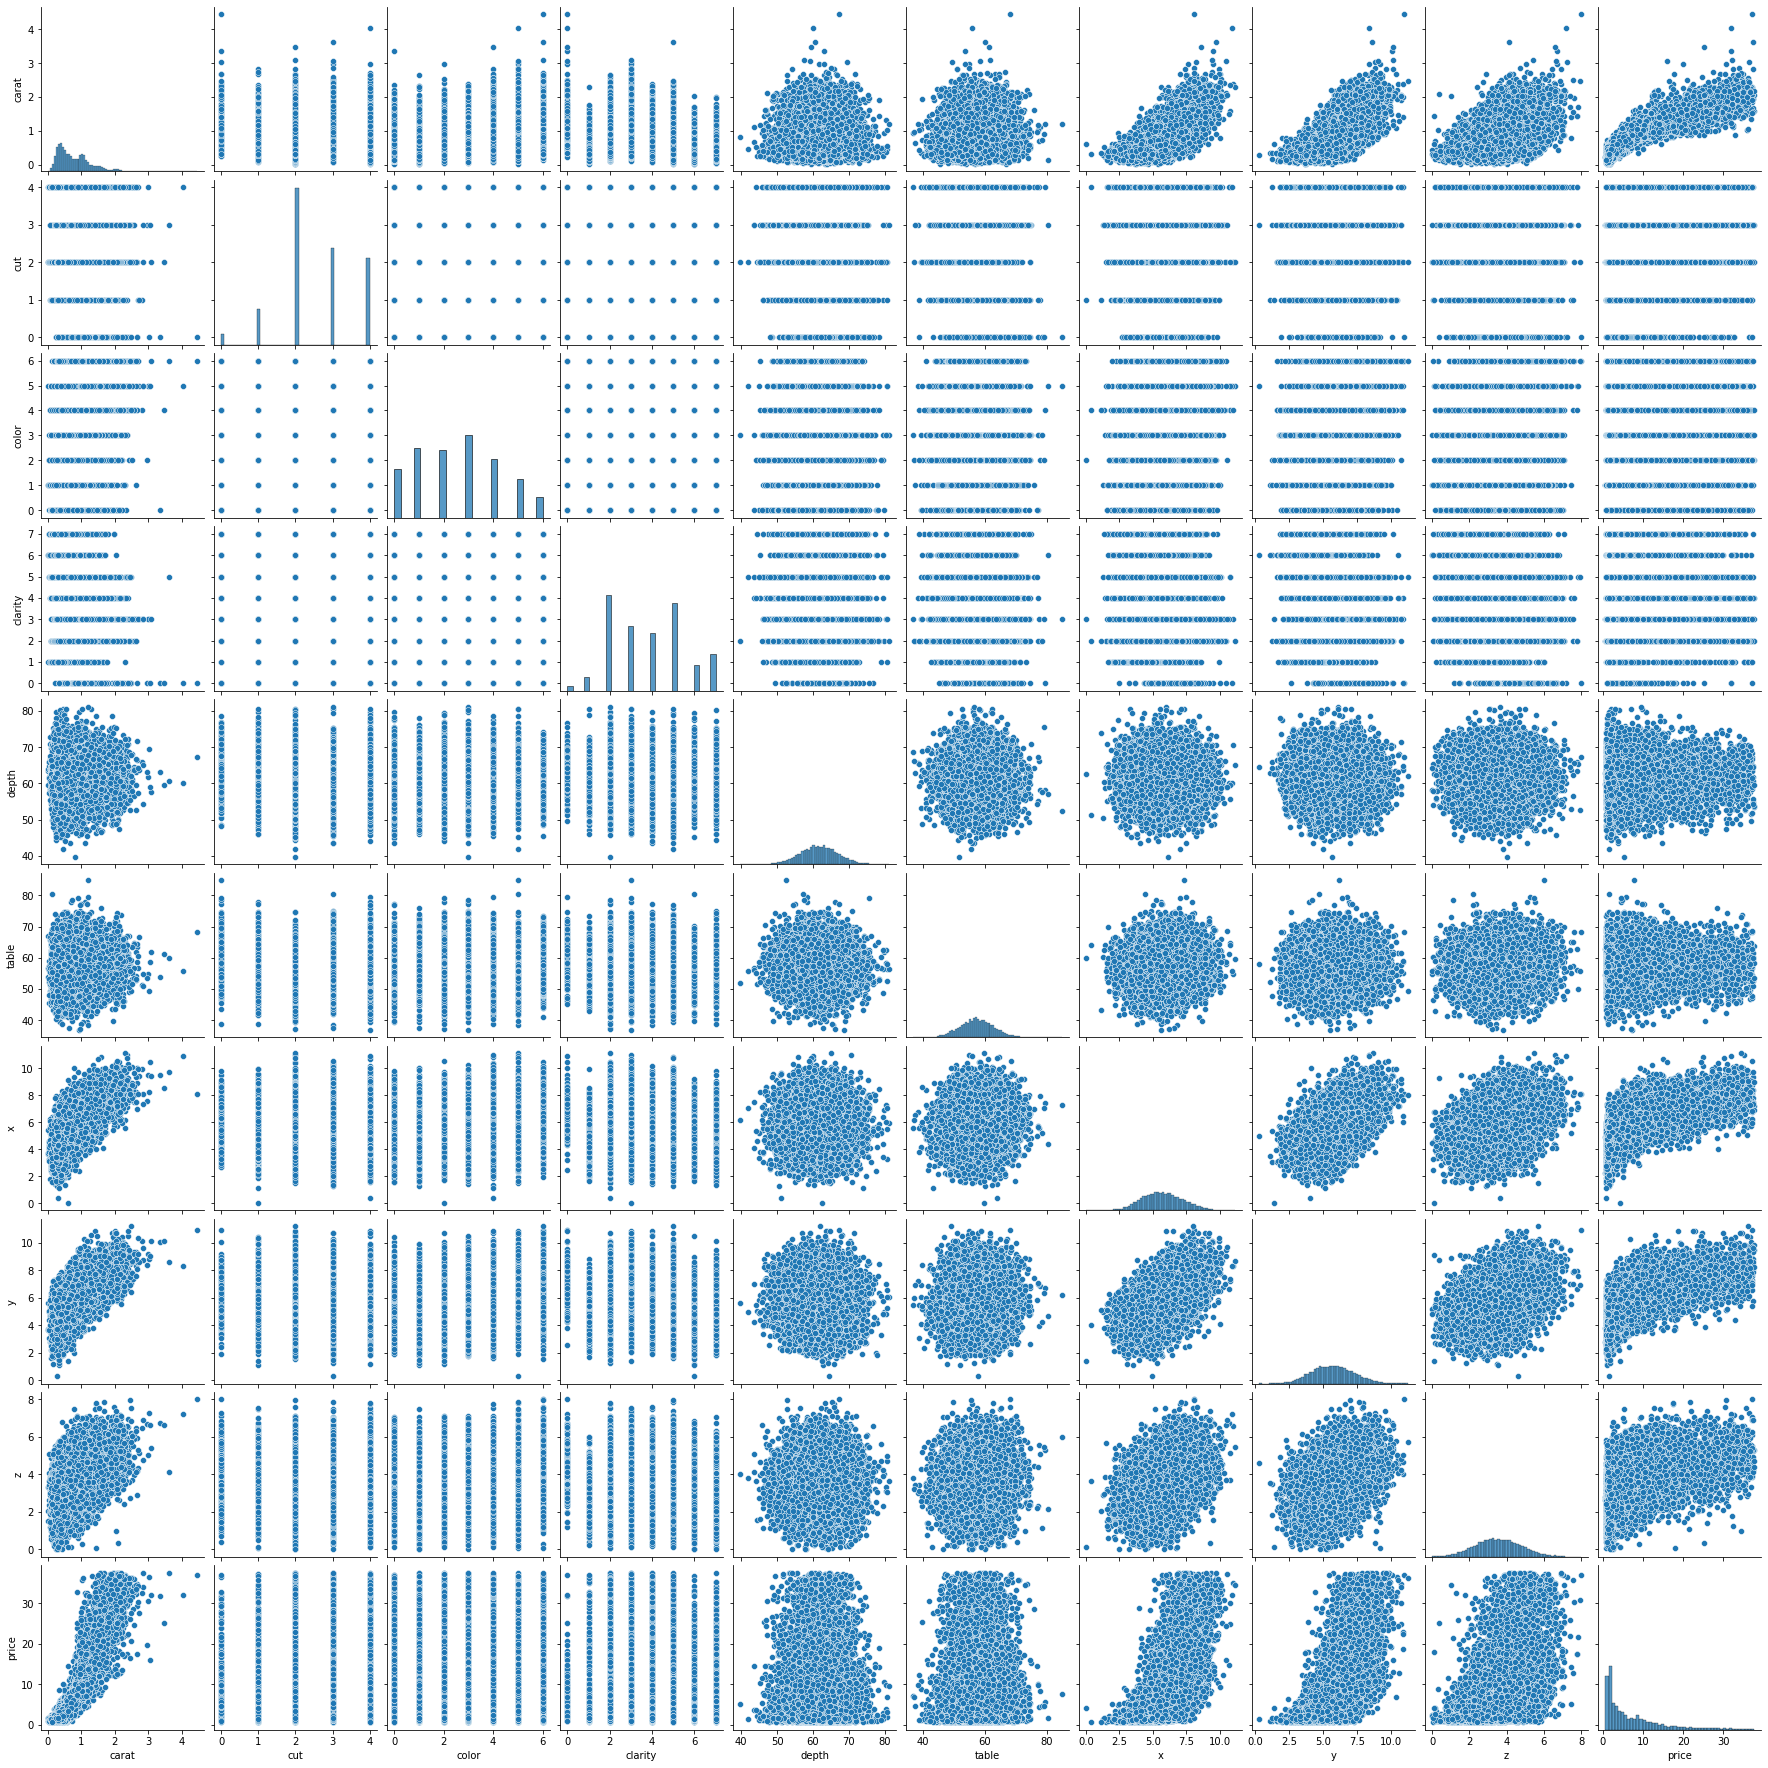

In [157]:
sns.pairplot(train)
plt.show()

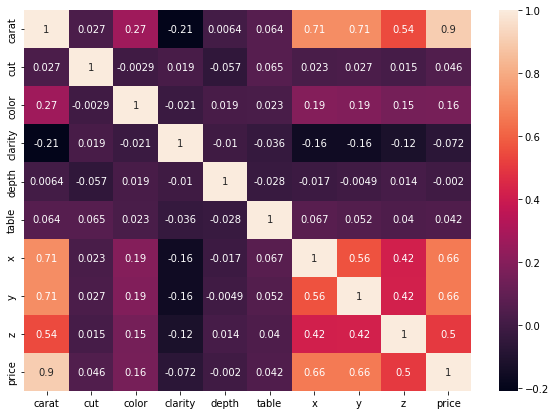

In [295]:
plt.figure(figsize=(10,7))
sns.heatmap(train.corr(),annot=True)
plt.show()

In [296]:
#As we can see from the heatmap and pairplot, the correlation between depth,table,cut,clarity and price(y) is almost 
#zero (-0.002,0.042,0.045,-0.076),i.e, no correlation
#Thus they can be said to be independent of each other
#So, we are dropping those columns

In [297]:
#carat is most correlated to price, thus its the most important factor

In [365]:
encoded_train.drop(['depth','table'],axis=1,inplace=True)
encoded_train

,carat,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.544971,5.447452,4.053076,3.701485,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,2.073682,6.266665,7.661507,6.177051,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0.606198,6.800151,5.096966,3.480326,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.695397,5.366931,6.616767,4.454435,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.282651,4.920104,4.409408,4.361358,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.251768,5.657402,5.832983,3.386799,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
11996,1.729415,6.725585,8.624433,4.822269,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
11997,2.252697,8.510526,9.108384,3.674364,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
11998,0.139030,2.799799,2.281538,2.419920,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [366]:
x_features=encoded_train.columns

In [367]:
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import r2_score

In [368]:
#reg=LinearRegression()
#reg.fit(x_train,y_train)
#y_pred=reg.predict(x_test)
#r2_score(y_test,y_pred)

In [369]:
#reg.coef_

In [370]:
import statsmodels.api as sm

In [371]:
#adding a constant column of 1 since otherwise (theta)0 will not be calculated
X=sm.add_constant(encoded_train)
Y=train['price']
X.head()

,const,carat,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.0,0.544971,5.447452,4.053076,3.701485,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1.0,2.073682,6.266665,7.661507,6.177051,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1.0,0.606198,6.800151,5.096966,3.480326,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1.0,0.695397,5.366931,6.616767,4.454435,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1.0,0.282651,4.920104,4.409408,4.361358,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [372]:
from sklearn.model_selection import train_test_split

In [441]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,random_state=100)

In [442]:
train_model_1=sm.OLS(y_train,x_train).fit()
train_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.872     
Dependent Variable: price            AIC:                47447.1769
Date:               2022-10-31 12:58 BIC:                47604.9063
No. Observations:   9600             Log-Likelihood:     -23702.   
Df Model:           21               F-statistic:        3128.     
Df Residuals:       9578             Prob (F-statistic): 0.00      
R-squared:          0.873            Scale:              8.1845    
-------------------------------------------------------------------
                 Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
-------------------------------------------------------------------
const           -15.7767   0.3466 -45.5133 0.0000 -16.4561 -15.0972
carat            15.6148   0.1109 140.7446 0.0000  15.3974  15.8323
x                 0.2282   0.0283   8.0512 0.0000   0.1726   0.2838
y                 0.2273   0.0277   8.1988 0.0000   0.1730   0.2816
z                 0.1325   0.0285   4.6427 0.0000   0.0766   0.1885
cut_Good          0.8060   0.1992   4.0455 0.0001   0.4155   1.1965
cut_Ideal         1.5327   0.1830   8.3764 0.0000   1.1740   1.8913
cut_Premium       1.3651   0.1848   7.3885 0.0000   1.0029   1.7272
cut_Very Good     1.2395   0.1866   6.6420 0.0000   0.8737   1.6054
color_E          -0.5115   0.1070  -4.7807 0.0000  -0.7212  -0.3018
color_F          -0.5890   0.1081  -5.4476 0.0000  -0.8009  -0.3770
color_G          -0.8100   0.1053  -7.6906 0.0000  -1.0164  -0.6035
color_H          -1.8135   0.1133 -16.0033 0.0000  -2.0356  -1.5913
color_I          -2.4756   0.1261 -19.6340 0.0000  -2.7227  -2.2284
color_J          -4.1447   0.1519 -27.2891 0.0000  -4.4424  -3.8469
clarity_IF       10.5741   0.3114  33.9612 0.0000   9.9638  11.1845
clarity_SI1       7.1861   0.2703  26.5854 0.0000   6.6563   7.7160
clarity_SI2       5.3754   0.2714  19.8062 0.0000   4.8434   5.9074
clarity_VS1       9.0427   0.2757  32.7963 0.0000   8.5022   9.5832
clarity_VS2       8.5167   0.2720  31.3116 0.0000   7.9836   9.0499
clarity_VVS1      9.9564   0.2926  34.0281 0.0000   9.3828  10.5299
clarity_VVS2      9.8043   0.2835  34.5867 0.0000   9.2486  10.3600
-------------------------------------------------------------------
Omnibus:              1961.556      Durbin-Watson:         2.059   
Prob(Omnibus):        0.000         Jarque-Bera (JB):      7612.258
Skew:                 0.976         Prob(JB):              0.000   
Kurtosis:             6.901         Condition No.:         237     
===================================================================

"""

In [443]:
#r2 is 0.873
#all features seem statistacally significant(p<0.05)
#no autocorrelation(durbin-watson value near 2.0)

/var/folders/0p/dzjf4bgs26dd8g57dcyk9rr80000gn/T/ipykernel_28613/1875049809.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_model_1.resid, fit=stats.norm)


<AxesSubplot:ylabel='Density'>

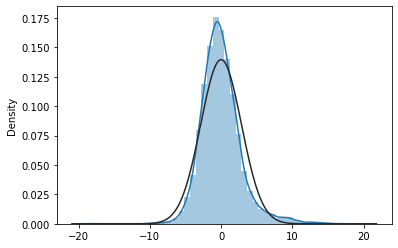

In [444]:
from scipy import stats
#checking how far our model follow the normal distribution
sns.distplot(train_model_1.resid, fit=stats.norm)

In [445]:
#now we check for multicollinearity

In [446]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [447]:
def get_vif_factors(X):
    X_matrix=X.to_numpy()
    vif=[variance_inflation_factor(X_matrix,i) for i in range(X_matrix.shape[1])]
    vif_factors=pd.DataFrame()
    vif_factors['column']=X.columns
    vif_factors['VIF']=vif
    return vif_factors

In [448]:
vif_factors=get_vif_factors(X[x_features])
vif_factors

,column,VIF
0,carat,12.143187
1,x,30.772705
2,y,29.746607
3,z,12.981141
4,cut_Good,3.820817
5,cut_Ideal,13.634834
6,cut_Premium,8.676273
7,cut_Very Good,7.928675
8,color_E,2.358643
9,color_F,2.341642


In [449]:
#we need to make sure vif is below 4.0
columns_with_large_vif=vif_factors[vif_factors.VIF>4].column

Text(0.5, 1.0, 'Correlation between features')

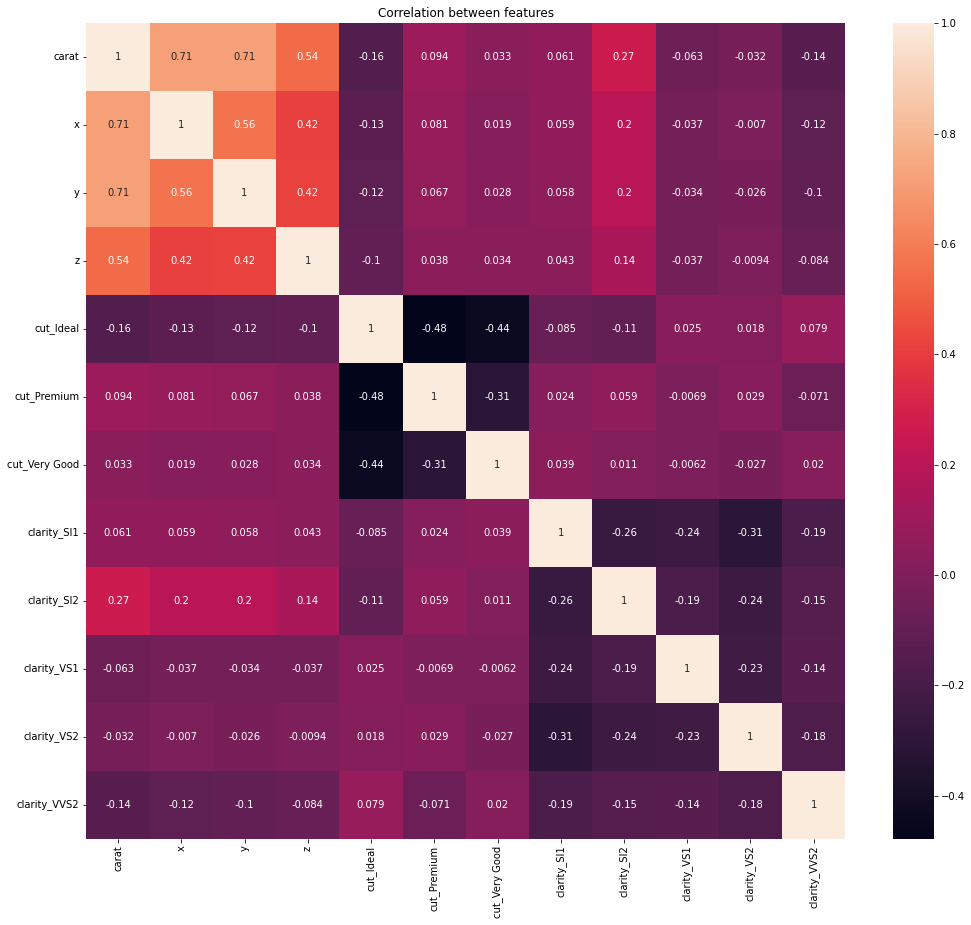

In [450]:
plt.figure(figsize=(17,15))
sns.heatmap(X[columns_with_large_vif].corr(),annot=True)
plt.title("Correlation between features")

In [451]:
#x,y,z are correlated
columns_to_be_removed = ['x','y','z','cut_Ideal','clarity_SI2']
X_new_features = list( set(x_features) - set(columns_to_be_removed))
vif_factors=get_vif_factors( X[X_new_features] )
vif_factors

,column,VIF
0,carat,3.601330
1,color_E,1.865594
2,clarity_IF,1.155518
3,color_H,1.888647
4,clarity_VVS2,1.337196
5,cut_Good,1.206668
6,cut_Very Good,1.483035
7,clarity_VS1,1.532007
8,cut_Premium,1.556624
9,clarity_VS2,1.748314


In [452]:
#multicollinearity is not there anymore

In [453]:
x_train=x_train[X_new_features]
x_train.head()

,carat,color_E,clarity_IF,color_H,clarity_VVS2,cut_Good,cut_Very Good,clarity_VS1,cut_Premium,clarity_VS2,color_G,color_J,clarity_VVS1,color_F,clarity_SI1,color_I
5948,1.464395,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3204,1.431293,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
8700,0.484223,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0
2342,0.447439,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2369,0.484833,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [454]:
train_model_2=sm.OLS(y_train,x_train).fit()
train_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.908     
Dependent Variable:     price            AIC:                         50787.0659
Date:                   2022-10-31 12:58 BIC:                         50901.7782
No. Observations:       9600             Log-Likelihood:              -25378.   
Df Model:               16               F-statistic:                 5894.     
Df Residuals:           9584             Prob (F-statistic):          0.00      
R-squared (uncentered): 0.908            Scale:                       11.597    
-----------------------------------------------------------------------------------
                     Coef.     Std.Err.       t        P>|t|      [0.025     0.975]
-----------------------------------------------------------------------------------
carat               14.7510      0.0704    209.5676    0.0000    14.6131    14.8890
color_E             -3.4531      0.1117    -30.9080    0.0000    -3.6721    -3.2341
clarity_IF           2.2291      0.1996     11.1662    0.0000     1.8378     2.6205
color_H             -4.4611      0.1235    -36.1146    0.0000    -4.7032    -4.2190
clarity_VVS2         1.6025      0.1306     12.2698    0.0000     1.3465     1.8585
cut_Good            -1.6221      0.1247    -13.0050    0.0000    -1.8666    -1.3776
cut_Very Good       -0.9360      0.0898    -10.4173    0.0000    -1.1121    -0.7598
clarity_VS1          1.2119      0.1101     11.0037    0.0000     0.9960     1.4278
cut_Premium         -0.9030      0.0866    -10.4282    0.0000    -1.0727    -0.7332
clarity_VS2          0.6674      0.0960      6.9495    0.0000     0.4791     0.8556
color_G             -3.4766      0.1122    -30.9842    0.0000    -3.6966    -3.2567
color_J             -6.1436      0.1759    -34.9289    0.0000    -6.4883    -5.7988
clarity_VVS1         1.6204      0.1543     10.5010    0.0000     1.3179     1.9229
color_F             -3.4499      0.1144    -30.1553    0.0000    -3.6741    -3.2256
clarity_SI1         -0.5250      0.0940     -5.5883    0.0000    -0.7092    -0.3409
color_I             -4.8992      0.1417    -34.5826    0.0000    -5.1769    -4.6215
--------------------------------------------------------------------------------
Omnibus:                 2035.672           Durbin-Watson:              1.999   
Prob(Omnibus):           0.000              Jarque-Bera (JB):           8499.788
Skew:                    0.991              Prob(JB):                   0.000   
Kurtosis:                7.162              Condition No.:              9       
================================================================================

"""

In [455]:
#training the model after removing multicollinearity gives a much better r2 value of 0.908
#all features seem statistacally significant(p<0.05)
#no autocorrelation(durbin-watson value near 2.0)

In [456]:
def draw_pp_plot( model, title ): 
    probplot = sm.ProbPlot( model.resid ); 
    plt.figure( figsize = (8, 6) ); 
    probplot.ppplot( line='45' ); 
    plt.title( title );
    plt.show();

<Figure size 576x432 with 0 Axes>

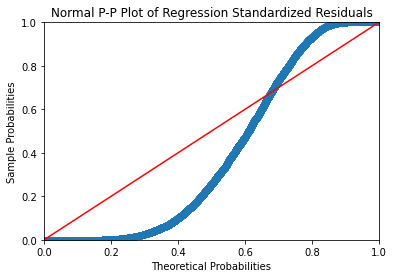

In [457]:
#p-p plot to check for normality
draw_pp_plot(train_model_2,"Normal P-P Plot of Regression Standardized Residuals");

In [458]:
def get_standardized_values( vals ): 
    return (vals - vals.mean())/vals.std()

In [459]:
def plot_resid_fitted(fitted, resid, title): 
    plt.scatter( get_standardized_values( fitted ), get_standardized_values( resid ) ) 
    plt.title(title)
    plt.xlabel("Standardized predicted values") 
    plt.ylabel("Standardized residual values") 
    plt.show()

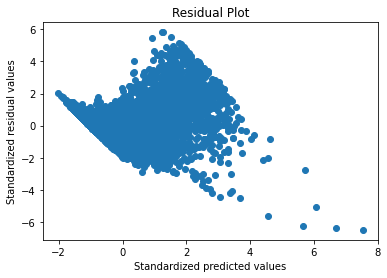

In [460]:
#check for heteroscedasticity
plot_resid_fitted(train_model_2.fittedvalues,
                  train_model_2.resid,
                  "Residual Plot")

In [461]:
#since the shape is a bit funnel-like we can conclude there is a bit of heteroscedasticity

In [462]:
y_train = np.sqrt(y_train)

In [463]:
train_model_3=sm.OLS(y_train,x_train).fit()
train_model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.978     
Dependent Variable:     price            AIC:                         10396.3844
Date:                   2022-10-31 12:58 BIC:                         10511.0967
No. Observations:       9600             Log-Likelihood:              -5182.2   
Df Model:               16               F-statistic:                 2.662e+04 
Df Residuals:           9584             Prob (F-statistic):          0.00      
R-squared (uncentered): 0.978            Scale:                       0.17263   
-----------------------------------------------------------------------------------
                     Coef.     Std.Err.       t        P>|t|      [0.025     0.975]
-----------------------------------------------------------------------------------
carat                2.7326      0.0086    318.2013    0.0000     2.7158     2.7495
color_E             -0.0252      0.0136     -1.8462    0.0649    -0.0519     0.0016
clarity_IF           0.7751      0.0244     31.8215    0.0000     0.7273     0.8228
color_H             -0.2335      0.0151    -15.4916    0.0000    -0.2630    -0.2039
clarity_VVS2         0.6930      0.0159     43.4907    0.0000     0.6618     0.7242
cut_Good            -0.0282      0.0152     -1.8553    0.0636    -0.0581     0.0016
cut_Very Good        0.0008      0.0110      0.0686    0.9453    -0.0207     0.0222
clarity_VS1          0.6097      0.0134     45.3700    0.0000     0.5833     0.6360
cut_Premium          0.0111      0.0106      1.0505    0.2935    -0.0096     0.0318
clarity_VS2          0.5324      0.0117     45.4424    0.0000     0.5095     0.5554
color_G             -0.0697      0.0137     -5.0940    0.0000    -0.0966    -0.0429
color_J             -0.6270      0.0215    -29.2176    0.0000    -0.6691    -0.5849
clarity_VVS1         0.6739      0.0188     35.7947    0.0000     0.6370     0.7108
color_F             -0.0268      0.0140     -1.9233    0.0545    -0.0542     0.0005
clarity_SI1          0.3575      0.0115     31.1860    0.0000     0.3350     0.3800
color_I             -0.3776      0.0173    -21.8466    0.0000    -0.4115    -0.3437
--------------------------------------------------------------------------------
Omnibus:                  2220.502          Durbin-Watson:             2.044    
Prob(Omnibus):            0.000             Jarque-Bera (JB):          38975.189
Skew:                     -0.646            Prob(JB):                  0.000    
Kurtosis:                 12.786            Condition No.:             9        
================================================================================

"""

In [472]:
#selecting only statistically significant features
sig_vars=['carat','clarity_IF','color_H','clarity_VVS2','clarity_VS1','clarity_VS2','color_G','color_J','clarity_VVS1','clarity_SI1','color_I']
x_train=x_train[sig_vars]
train_model_4=sm.OLS(y_train,x_train).fit()
train_model_4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.978     
Dependent Variable:     price            AIC:                         10397.5961
Date:                   2022-10-31 13:03 BIC:                         10476.4608
No. Observations:       9600             Log-Likelihood:              -5187.8   
Df Model:               11               F-statistic:                 3.869e+04 
Df Residuals:           9589             Prob (F-statistic):          0.00      
R-squared (uncentered): 0.978            Scale:                       0.17274   
-----------------------------------------------------------------------------------
                     Coef.     Std.Err.       t        P>|t|      [0.025     0.975]
-----------------------------------------------------------------------------------
carat                2.7239      0.0073    372.0060    0.0000     2.7095     2.7382
clarity_IF           0.7596      0.0233     32.5595    0.0000     0.7139     0.8053
color_H             -0.2149      0.0127    -16.8885    0.0000    -0.2399    -0.1900
clarity_VVS2         0.6792      0.0146     46.5076    0.0000     0.6505     0.7078
clarity_VS1          0.5972      0.0121     49.2783    0.0000     0.5734     0.6210
clarity_VS2          0.5212      0.0103     50.3697    0.0000     0.5009     0.5414
color_G             -0.0515      0.0111     -4.6444    0.0000    -0.0733    -0.0298
color_J             -0.6073      0.0195    -31.2241    0.0000    -0.6455    -0.5692
clarity_VVS1         0.6584      0.0174     37.7370    0.0000     0.6242     0.6926
clarity_SI1          0.3466      0.0103     33.7508    0.0000     0.3265     0.3667
color_I             -0.3586      0.0151    -23.7447    0.0000    -0.3882    -0.3290
--------------------------------------------------------------------------------
Omnibus:                  2171.141          Durbin-Watson:             2.043    
Prob(Omnibus):            0.000             Jarque-Bera (JB):          37835.645
Skew:                     -0.622            Prob(JB):                  0.000    
Kurtosis:                 12.646            Condition No.:             6        
================================================================================

"""

<Figure size 576x432 with 0 Axes>

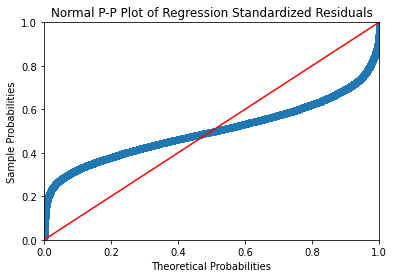

In [466]:
draw_pp_plot(train_model_4,"Normal P-P Plot of Regression Standardized Residuals");

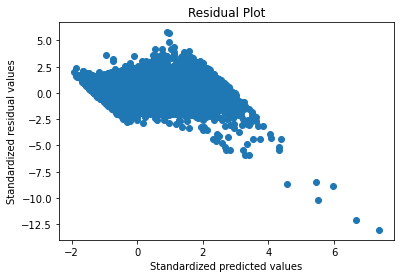

In [468]:
plot_resid_fitted(train_model_4.fittedvalues,
                  train_model_4.resid,
                  "Residual Plot")

In [469]:
pred_y = np.power(train_model_4.predict(x_test[x_train.columns]),2)

In [470]:
from sklearn import metrics
metrics.r2_score(pred_y, y_test)

0.8497029699025695

/var/folders/0p/dzjf4bgs26dd8g57dcyk9rr80000gn/T/ipykernel_28613/2180467007.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_model_3.resid, fit=stats.norm)


<AxesSubplot:ylabel='Density'>

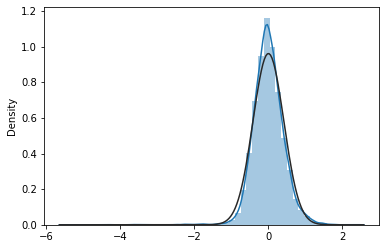

In [471]:
sns.distplot(train_model_3.resid, fit=stats.norm)